In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# Section 1.1: Exchange Traded Funds



### Calculate ETF Returns

In [2]:

#download closing prices from Yahoo Finance and import the data using pandas.
#DATA URL: https://finance.yahoo.com/quote/FEZ/history?p=FEZ

fez_data=pd.read_csv('FEZ.csv', index_col=0) #assume the downloaded data is in the same directory as the python file
fez_data




,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-10-21,24.360001,25.000000,24.360001,25.000000,14.424747,46100
2002-10-22,24.590000,24.590000,24.500000,24.500000,14.136254,2100
2002-10-23,23.830000,23.879999,23.330000,23.879999,13.778524,87200
2002-10-24,24.219999,24.219999,23.740000,23.780001,13.720822,61900
2002-10-25,24.049999,24.049999,24.049999,24.049999,13.876608,500
2002-10-28,24.730000,24.799999,24.420000,24.420000,14.090096,23500
2002-10-29,23.540001,23.860001,23.400000,23.799999,13.732357,70100
2002-10-30,24.250000,24.450001,24.250000,24.440001,14.101641,8200
2002-10-31,24.879999,25.020000,24.559999,24.650000,14.222798,48500


In [3]:
type(fez_data.iloc[1,1])

numpy.float64

In [4]:


close_day=fez_data['Adj Close'] #Use adjusted close price data which is adjusted for both dividends and splits,
#as noted on the Yahoo Finance website
close_day2=close_day.iloc[1:len(close_day)] # Collect all day 2 data. Omit the first datapoint in the dataset. 
#We can't calculate the return on this day as we don't know the price from previous day.
close_day1=fez_data['Adj Close'].iloc[:len(close_day)-1] #Collect all day 1 data, i.e. all 'previous' days. Omit final 
#data point since it's not a 'previous' day
day2_data=close_day2.values
day1_data=close_day1.values
return_etf=((day2_data - day1_data)/day1_data)*100
#Now, add this array into the original dataframe. Add 'NaN' for index O since the return on first day is not relevant
return_etf=list(return_etf)
return_etf.insert(0, "NaN",)
fez_data['Daily Returns']=return_etf
fez_data

,Open,High,Low,Close,Adj Close,Volume,Daily Returns
Date,,,,,,,
2002-10-21,24.360001,25.000000,24.360001,25.000000,14.424747,46100,NaN
2002-10-22,24.590000,24.590000,24.500000,24.500000,14.136254,2100,-1.99999
2002-10-23,23.830000,23.879999,23.330000,23.879999,13.778524,87200,-2.53059
2002-10-24,24.219999,24.219999,23.740000,23.780001,13.720822,61900,-0.418782
2002-10-25,24.049999,24.049999,24.049999,24.049999,13.876608,500,1.1354
2002-10-28,24.730000,24.799999,24.420000,24.420000,14.090096,23500,1.53847
2002-10-29,23.540001,23.860001,23.400000,23.799999,13.732357,70100,-2.53894
2002-10-30,24.250000,24.450001,24.250000,24.440001,14.101641,8200,2.68915
2002-10-31,24.879999,25.020000,24.559999,24.650000,14.222798,48500,0.85917


### Display and analyze holdings data

In [5]:

#Data from State Street Global Advisors  
#URL:https://us.spdrs.com/en/etf/spdr-euro-stoxx-50-etf-FEZ

holdings_data=pd.read_csv('FEZ_All_Holdings.csv', index_col=0) #assume the downloaded data is in the same directory as the python file
holdings_data






,Ticker,Identifier,SEDOL,Weight,Sector,Shares Held,Local Currency
Name,,,,,,,
SAP SE,SAP-DE,484628,4846288,5.038130,Information Technology,798314.00,EUR
Total SA,FP-FR,B15C55,B15C557,4.947309,Energy,1955487.00,EUR
LVMH Moet Hennessy Louis Vuitton SE,MC-FR,406141,4061412,4.046411,Consumer Discretionary,196039.00,EUR
ASML Holding NV,ASML-NL,B929F4,B929F46,3.890130,Information Technology,312101.00,EUR
Linde plc,LIN-DE,BYWD9S,BYWD9S5,3.864386,Materials,404741.00,EUR
Sanofi,SAN-FR,567173,5671735,3.566026,Health Care,831269.00,EUR
Allianz SE,ALV-DE,523148,5231485,3.485663,Financials,311206.00,EUR
Siemens AG,SIE-DE,572797,5727973,3.431184,Industrials,585764.00,EUR
Unilever NV,UNA-NL,B1527V,B1527V7,2.945059,Consumer Staples,1067264.00,EUR




The ETF is denominated in USD whereas the underlying stocks are denominated in Euro. Many ETF sponsors deal with such
a currency mismatch by hedging the foreign currency, through instruments like currency futures, options or forwards. This protects them against exchange rate risk 




### Use ticker automation to calculate the returns on the constituent stocks

In [6]:

#Attempt automation
from tqdm.notebook import tqdm #please be sure to install tqdm if you don't have it

tickers = pd.read_csv('FEZ_All_Holdings.csv', header=0).dropna()
ticker_list = tickers.Ticker.values

from alpha_vantage.timeseries import TimeSeries
key='CGP61XIA2BSTQXDR'
ts = TimeSeries(key)
portfolio_data = {}
for ticker in tqdm(ticker_list):
    try:
        data, meta = ts.get_daily(symbol=ticker)
    except:
        try:
            data, meta = ts.get_daily(symbol=ticker.split('-')[0])
        except:
            try:
                data, meta = ts.get_daily(symbol=ticker.replace('-','.'))
            except:
                print('Could not find data for ticker = ' + ticker)
                continue
    portfolio_data[ticker] = pd.DataFrame(data).T[::-1]

A Jupyter Widget

Could not find data for ticker = FP-FR
Could not find data for ticker = MC-FR
Could not find data for ticker = ASML-NL
Could not find data for ticker = LIN-DE
Could not find data for ticker = SAN-FR
Could not find data for ticker = ALV-DE
Could not find data for ticker = SIE-DE
Could not find data for ticker = UNA-NL
Could not find data for ticker = AIR-FR
Could not find data for ticker = BAYN-DE
Could not find data for ticker = BAS-DE
Could not find data for ticker = OR-FR
Could not find data for ticker = ABI-BE
Could not find data for ticker = SAN-ES
Could not find data for ticker = BNP-FR
Could not find data for ticker = DG-FR
Could not find data for ticker = AI-FR
Could not find data for ticker = ENEL-IT
Could not find data for ticker = SAF-FR
Could not find data for ticker = CS-FR
Could not find data for ticker = IBE-ES
Could not find data for ticker = DTE-DE
Could not find data for ticker = ADS-DE
Could not find data for ticker = SU-FR
Could not find data for ticker = BN-FR
Could

In [7]:

portfolio_data

{'EL-FR':              1. open   2. high    3. low  4. close 5. volume
 2020-02-05  203.6000  204.2500  200.5500  201.2800   1686327
 2020-02-04  199.4000  202.2200  198.4600  200.4200   2252161
 2020-02-03  195.6800  199.3100  195.0400  196.2000   2301554
 2020-01-31  197.6000  198.7900  194.6650  195.1600   1620571
 2020-01-30  197.6800  198.9900  195.1300  198.6700   1497600
 2020-01-29  198.6600  200.3100  197.9500  198.7300   1446071
 2020-01-28  197.9600  199.1300  195.1000  197.1100   2035473
 2020-01-27  192.0100  198.2400  191.0700  196.9900   4042606
 2020-01-24  209.0000  209.5919  204.3300  205.3400   2420791
 2020-01-23  209.0900  211.5800  206.7100  208.8700   2781189
 2020-01-22  216.2600  217.6200  211.5300  212.6400   2528575
 2020-01-21  215.4100  217.9300  212.7300  217.7300   2104105
 2020-01-17  219.0600  220.4200  218.3955  219.8800   1146998
 2020-01-16  218.4900  219.2900  217.2000  217.9400   1623763
 2020-01-15  216.0000  219.1100  216.0000  218.4900   1696524

In [8]:

#Automation did not work so I'll be considering the data from the top 5 companies
#All data obtained from Yahoo Finance. Wanted to find a reputable source with data on all top 5 companies 

sap_data=pd.read_csv('SAP.DE.csv', index_col=0) #URL: https://finance.yahoo.com/quote/SAP.DE/history?p=SAP.DE
total_data=pd.read_csv('FP.PA.csv', index_col=0) #URL: https://finance.yahoo.com/quote/FP.PA/history?p=FP.PA
lvmh_data=pd.read_csv('MC.PA.csv', index_col=0) #URL: https://finance.yahoo.com/quote/MC.PA/key-statistics?p=MC.PA
asml_data=pd.read_csv('ASML.AS.csv', index_col=0) #URL: https://finance.yahoo.com/quote/ASML.AS/history?p=ASML.AS&.tsrc=fin-srch
lin_data=pd.read_csv('LIN.DE.csv', index_col=0) #URL: https://uk.finance.yahoo.com/quote/LIN.DE/history?

              



In [9]:
 
#Build a function to automate the calculation of returns for each of the five companies


def calculate_returns(company_data):
   #Calculate daily retuns for the company
   close_day=company_data['Adj Close'] #Use adjusted close price data which is adjusted for both dividends and splits,
   #as noted on the Yahoo Finance website
   close_day2=close_day.iloc[1:len(close_day)] # Collect all day 2 data. Omit the first datapoint in the dataset. 
   #We can't calculate the return on this day as we don't know the price from previous day.
   close_day1=close_day.iloc[:len(close_day)-1] #Collect all day 1 data, i.e. all 'previous' days. Omit final 
   #data point since it's not a 'previous' day
   day2_data=close_day2.values
   day1_data=close_day1.values
   return_company=((day2_data - day1_data)/day1_data)*100
   #Now, add this array into the original dataframe. Add 'NaN' for index O since the return on first day is not relevant
   return_company=list(return_company)
   return_company.insert(0, "NaN",)
   company_data['Daily Returns']=return_company
   return company_data

#Call this function to calculate returns on each company
sap_returns=calculate_returns(sap_data)
total_returns=calculate_returns(total_data)
lvmh_returns=calculate_returns(lvmh_data)
asml_returns=calculate_returns(asml_data)
lin_returns=calculate_returns(lin_data)



### Use exchange rate data to calculate the returns in dollars, the base currency of the ETF

In [10]:


eurusd_exchange=pd.read_csv('EUR_USD Historical Data.csv', index_col=0) #URL: https://www.investing.com/currencies/eur-usd-historical-data
eurusd_exchange


#Build a funciton to automate currency conversions and calculation of returns 

def calculate_dollarreturns(company_data):
   #Calculate daily retuns for the company
   close_day=company_data['Adj Close'] 
   close_day2=close_day.iloc[1:len(close_day)] 
   close_day1=close_day.iloc[:len(close_day)-1] 
   exrate_day2=eurusd_exchange['Price'].iloc[1:len(close_day)] #collect exchange rate data for day 2's 
   exrate_day1=eurusd_exchange['Price'].iloc[:len(close_day)-1]#collect exchange rate data for  day 1's
   day2_data=close_day2.values*exrate_day2.values #convert each stock price to dollars using the exchange rate of that day
   day1_data=close_day1.values*exrate_day1.values
   return_company=((day2_data - day1_data)/day1_data)*100
   #Now, add this array into the original dataframe. Add 'NaN' for index O since the return on first day is not calculable
   return_company=list(return_company)
   return_company.insert(0, "NaN",)
   company_data['Returns in Dollars']=return_company

   return company_data

#Call the function on each company 

sap_dollarreturns=calculate_dollarreturns(sap_data)
total_dollarreturns=calculate_dollarreturns(total_data)
lvmh_dollarreturns=calculate_dollarreturns(lvmh_data)
asml_dollarreturns=calculate_dollarreturns(asml_data)
lin_dollarreturns=calculate_dollarreturns(lin_data)

### Calculate the weight of each constituent by combining the holdings and stock price data.

In [11]:
#Holding data current as of November 12, 2019. So will use ETF price for this day 

#First task is to come up with a formula for company weight. 
#Would have used this formula: 
#weight_company = (company_shares_in_ETF*share_price)/(Σcompany_shares_in_ETF*share_price)
#However I don't have time left to collect prices for all constituent stocks.
#So will try the following formula

#weight_company = (company_shares_in_ETF*share_price)/(ETF_price*no_of_ETFs)
#ETF

#Build function to calculate weight
def calculate_weight(company_name,company_data):
    company_shares_in_ETF=holdings_data["Shares Held"][company_name]
    no_of_ETFs=fez_data["Volume"]["2019-11-12"]
    ETF_price=fez_data["Adj Close"]["2019-11-12"]
    share_price=company_data["Adj Close"]["2019-11-12"]*eurusd_exchange["Price"]["Nov 12, 2019"] #share price in USD
    weight_company=(company_shares_in_ETF*share_price)/(ETF_price*no_of_ETFs)
    return weight_company

#Call function on each company
calculate_weight("SAP SE",sap_data)
calculate_weight("Total SA",total_data)
calculate_weight("LVMH Moet Hennessy Louis Vuitton SE",lvmh_data)
calculate_weight("ASML Holding NV",asml_data)
calculate_weight("Linde plc",lin_data)

#This formula cannot be true. Weight cannot be above 1!

1.3729576267328201

# Section 1.2: Google Trends

### Explain Google Trends estimation process by examining search engine data for Johns Hopkins University

In [12]:
df = pd.read_csv('JHU.csv', header=1)


In [13]:
df['Month']= pd.to_datetime(df['Month'])

Text(0.5,1,'Johns Hopkins University: (Worldwide) Monthly Google Trends Data')

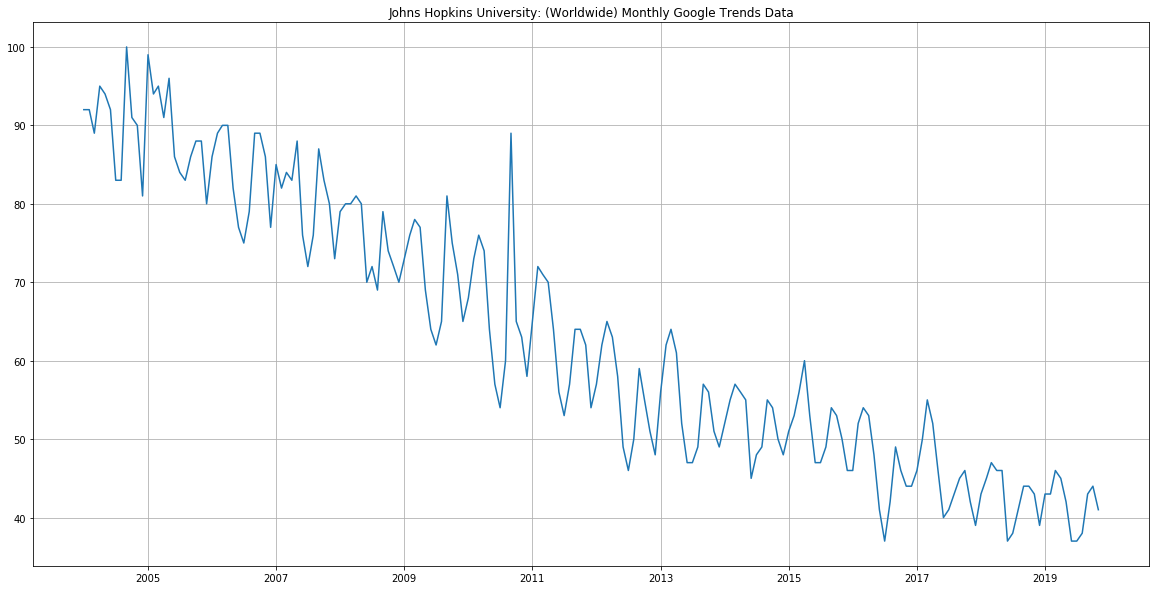

In [14]:
fig = plt.subplots(figsize=(20, 10))
plt.plot(df['Month'], df['Johns Hopkins University: (Worldwide)'])
plt.grid()
plt.title('Johns Hopkins University: (Worldwide) Monthly Google Trends Data')


By Google's documentation, the time series is in an integer scale btw. 0 to 100, where 100 denotes maximum popularity, and 0 denotes no data. Hence, Google must be taking the maximum number of searches Hopkins has got over the timeframe and divide each search amount by the maximum as a way to normalize, so that you can compare multiple trends on a single plot.

The time series is  downward sloping. While it may look like interest in Johns Hopkins University has decreased over time, Google rates searches by weighing their search frequency relative to a sample of all searches on all topics. This means the total volume of JHU searches hasn't decreased but rather the frequency of other searches has increased over time, lowering the proportion of the JHU searches

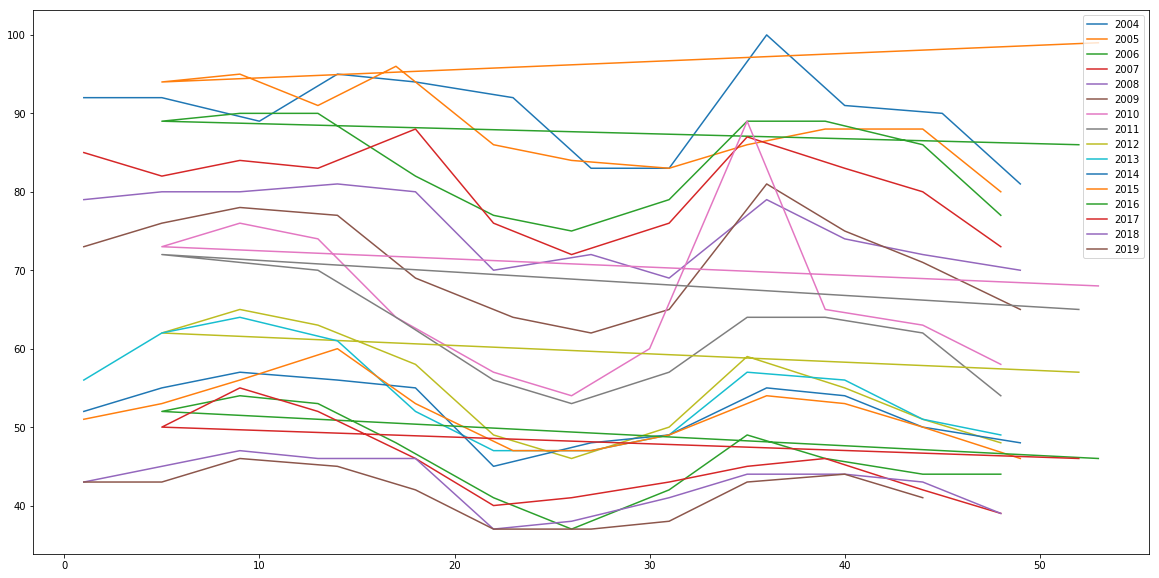

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
for label, df_ in df.groupby(df['Month'].dt.year):
    plt.plot(df_['Month'].dt.week, df_['Johns Hopkins University: (Worldwide)'], label=label)
plt.legend()



As can be seen from the plot above, there is a general increase over the months of august to september, which corresponds to the time that the school season begins. There is also a drop over the summer period when students are on vacation.

### Import ETF search frequency data for 2014-2019 and compare the data with disambiguated data

In [16]:
df_fez = pd.read_csv('fez_amb.csv', header=1)
df_fez['Week'] = pd.to_datetime(df_fez['Week'])


In [17]:
df_fez_disamb = pd.read_csv('fez_disamb.csv', header=1)
df_fez_disamb['Week'] = pd.to_datetime(df_fez_disamb['Week'])

I used the Finance category marker on Google Trends to disambiguate the category, and I added the word "ETF" to the end of the query to specify it further.

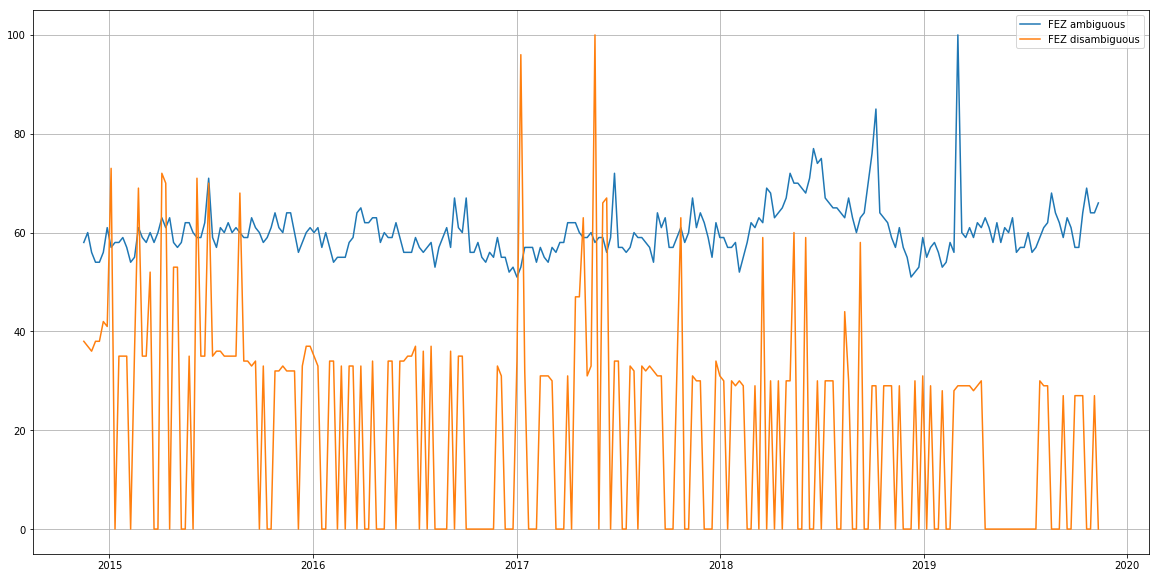

In [18]:
plt.subplots(figsize=(20,10))
plt.plot(df_fez['Week'], df_fez['FEZ: (Worldwide)'], label='FEZ ambiguous')
plt.plot(df_fez_disamb['Week'], df_fez_disamb['FEZ ETF: (Worldwide)'], label='FEZ disambiguous')
plt.grid()
plt.legend()

In [19]:
tickers = pd.read_csv('FEZ_All_Holdings.csv', header=0).dropna()

In [20]:
ticker_list = tickers.Ticker.values

[x.split('-')[0] for x in ticker_list] 

['SAP',
 'FP',
 'MC',
 'ASML',
 'LIN',
 'SAN',
 'ALV',
 'SIE',
 'UNA',
 'AIR',
 'BAYN',
 'BAS',
 'OR',
 'ABI',
 'SAN',
 'BNP',
 'DG',
 'AI',
 'ENEL',
 'SAF',
 'CS',
 'IBE',
 'DTE',
 'ADS',
 'SU',
 'BN',
 'DAI',
 'INGA',
 'EL',
 'KER',
 'ISP',
 'MUV2',
 'ENI',
 'PHIA',
 'VOW3',
 'DPW',
 'BBVA',
 'TEF',
 'AMS',
 'ITX',
 'ORA',
 'AD',
 'CRG',
 'ENGI',
 'DB1',
 'GLE',
 'BMW',
 'VIV',
 'FRE',
 'NOKIA',
 'CASH_EUR',
 '85749246',
 'CASH_USD']

In [21]:
ticker_list

array(['SAP-DE', 'FP-FR', 'MC-FR', 'ASML-NL', 'LIN-DE', 'SAN-FR', 'ALV-DE',
       'SIE-DE', 'UNA-NL', 'AIR-FR', 'BAYN-DE', 'BAS-DE', 'OR-FR',
       'ABI-BE', 'SAN-ES', 'BNP-FR', 'DG-FR', 'AI-FR', 'ENEL-IT', 'SAF-FR',
       'CS-FR', 'IBE-ES', 'DTE-DE', 'ADS-DE', 'SU-FR', 'BN-FR', 'DAI-DE',
       'INGA-NL', 'EL-FR', 'KER-FR', 'ISP-IT', 'MUV2-DE', 'ENI-IT',
       'PHIA-NL', 'VOW3-DE', 'DPW-DE', 'BBVA-ES', 'TEF-ES', 'AMS-ES',
       'ITX-ES', 'ORA-FR', 'AD-NL', 'CRG-IE', 'ENGI-FR', 'DB1-DE',
       'GLE-FR', 'BMW-DE', 'VIV-FR', 'FRE-DE', 'NOKIA-FI', 'CASH_EUR',
       '85749246', 'CASH_USD'], dtype=object)

In [22]:
import requests
import json

In [23]:
for x in ticker_list:
    print(x.split('-')[0])

SAP
FP
MC
ASML
LIN
SAN
ALV
SIE
UNA
AIR
BAYN
BAS
OR
ABI
SAN
BNP
DG
AI
ENEL
SAF
CS
IBE
DTE
ADS
SU
BN
DAI
INGA
EL
KER
ISP
MUV2
ENI
PHIA
VOW3
DPW
BBVA
TEF
AMS
ITX
ORA
AD
CRG
ENGI
DB1
GLE
BMW
VIV
FRE
NOKIA
CASH_EUR
85749246
CASH_USD


Determining which of the queries is better, although difficult to tell directly from data, can be easy using the insights available on Google trends. We observe that the regions of popularity - most of which was South America with an emphasis on Brazil - with an assumption that an ETF containing european stocks would not be most popular in Brazil, suggested that the ambiguous query captured some material other than the ETF. Also, looking at the suggested related topics on the Google Trends page was good indication that the ambiguous ticker data contained information about other topics like livestock and Brazilian politics. Specifying the category to finance and adding the ETF marker changed the related topics to ETF and EURO STOXX related results. Therefore, the **disambiguated** search is indeed "better".

### Import ETF search frequency data for 2009-2014

In [24]:
df1 = pd.read_csv('fez_2009-2014.csv', header=1, names=['Week', 'FEZ'], index_col='Week' )
df1.index = pd.to_datetime(df1.index)
df2 = pd.read_csv('fez_2014-now.csv', header=1, names=['Week','FEZ'], index_col='Week' )
df2.index = pd.to_datetime(df2.index)

# Section 2: Transforming Data

### Stitch the two time frames together, 2009-2014 and 2014-2019 and visualize trends data

To stitch the timeframes together, as both timeframes are normalized by their individual maximum values, we find a point in time where the two timeframes overlap. At this point we compare the values and for whichever one is bigger - 2009-2014 in this case, we adjust each value in the timeframe relative to the 2014-2019 timeframe, as the value for the former timeframe being bigger implies that the latter timeframe has a larger maximum popularity. The mismatch in the data is visible in the plot below. The adjustment ratio was found to be 0.6, meaning multiplying the older timeframe popularity values with the ratio aligns the values of the two timeframes.

Note that, there was a small mismatch in the values for the overlapping two weeks: we saw an minor increase in popularity for the older timeframe (35 @2014-11-16 -> 36 @2014-11-23) and a minor decrease in popularity for the newer (21 @2014-11-16 -> 20 @2014-11-23). We will attribute this to a small data error and ignore it for the sake of time management.

In [25]:
import datetime as dt

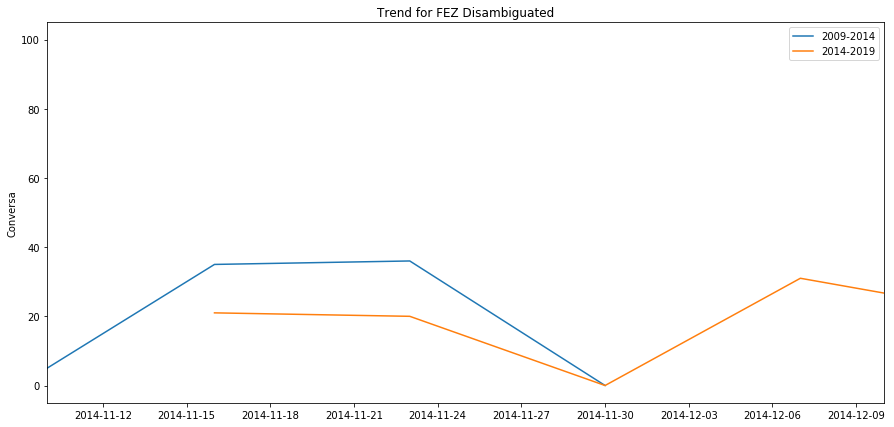

In [26]:
plt.subplots(figsize=(15, 7))
plt.plot(df1.index, df1['FEZ'], label='2009-2014')
plt.plot(df2.index, df2['FEZ'], label='2014-2019')
plt.xlim(dt.datetime(2014, 11, 10),dt.datetime(2014, 12, 10))
plt.title('Trend for FEZ Disambiguated')
plt.ylabel('Conversa')
plt.legend()

In [27]:

#adjusting 2009-2014 data relative to 2014-2019 data. Normalize 2009-2014 data according to 2014-2019 data
adjustment_ratio =(df2.loc[df2.index[0]]/df1.loc[df2.index[0]])[0]
df1['FEZ_adjusted'] = adjustment_ratio*df1['FEZ']

In [28]:
#stitching 5-year slices together
fez_trend = df1['FEZ_adjusted'].append(df2['FEZ'])
fez_trend

Week
2009-12-06     0.0
2009-12-13     0.0
2009-12-20     0.0
2009-12-27     0.0
2010-01-03     0.0
2010-01-10     0.0
2010-01-17     0.0
2010-01-24     0.0
2010-01-31     0.0
2010-02-07     0.0
2010-02-14     0.0
2010-02-21    51.6
2010-02-28     0.0
2010-03-07     0.0
2010-03-14     0.0
2010-03-21     0.0
2010-03-28     0.0
2010-04-04     0.0
2010-04-11     0.0
2010-04-18     0.0
2010-04-25     0.0
2010-05-02     0.0
2010-05-09    53.4
2010-05-16    52.8
2010-05-23    54.6
2010-05-30     0.0
2010-06-06     0.0
2010-06-13     0.0
2010-06-20     0.0
2010-06-27    54.0
              ... 
2019-04-21    16.0
2019-04-28    16.0
2019-05-05    16.0
2019-05-12    16.0
2019-05-19    32.0
2019-05-26    16.0
2019-06-02    16.0
2019-06-09     0.0
2019-06-16     0.0
2019-06-23    16.0
2019-06-30    16.0
2019-07-07     0.0
2019-07-14    16.0
2019-07-21    16.0
2019-07-28    16.0
2019-08-04    16.0
2019-08-11    16.0
2019-08-18     0.0
2019-08-25    16.0
2019-09-01    15.0
2019-09-08    15.0
2019-09

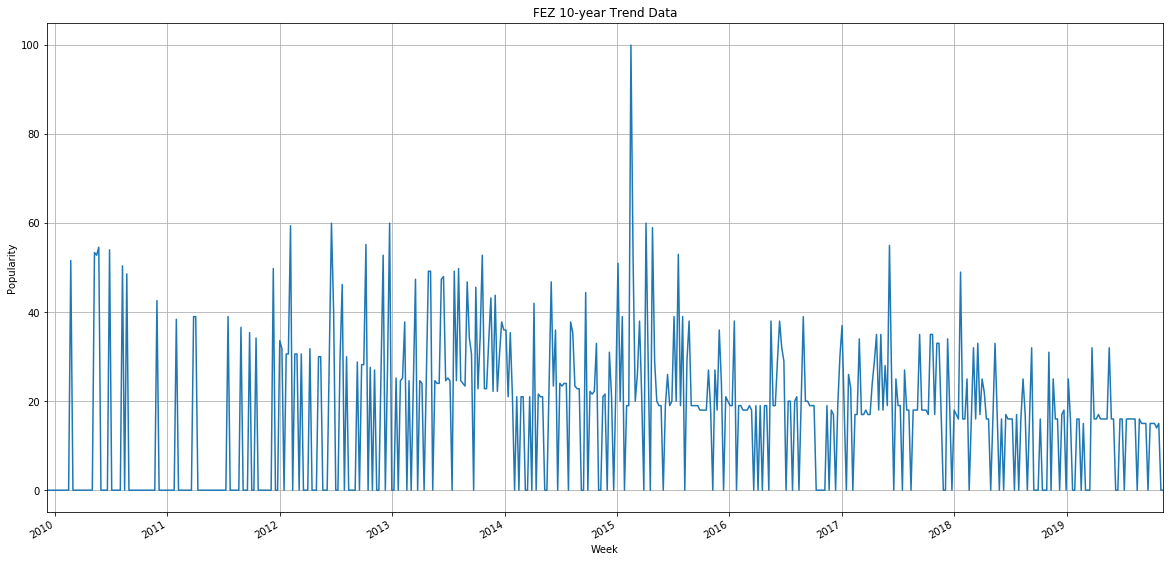

In [29]:
fig = plt.subplots(figsize=(20,10))
fez_trend.plot()
plt.title('FEZ 10-year Trend Data')
plt.ylabel('Popularity')
plt.grid()

### Resolve the mismatch in frequency between the ETF and stock return data



(a) Considering that our ultimate goal is to analyze the relationship between trend and stock return data, where we will use the trend data as our independent variable and the stock returns as the target, the most feasible option is to **aggregate the daily stock return data to a weekly frequency**. If we had chosen to do the opposite and project the weekly trend data to daily, as there would be no sufficient reason to do otherwise, we would have to use the same value for each day in a given week as the value for that week. This would mean, even if the stock returns change daily, in our regression there would not be any added benefit to using the daily trend values that are unchanging for a week instead of using just a single value at that given week. In fact it would be quite likely that the regression coefficients would be close to zero, and thus the values for the other days of a given week would be redundant. 

(b) 

(i) I merely converted the dates to the week number of the year using pandas datetime functions, and recomputed the returns based on the closing of the last day of the week.

(ii) Comments below figures and statistics.

In [30]:
fez_returns = pd.read_csv('returns.csv')
fez_returns['Date'] = pd.to_datetime(fez_returns['Date'])

In [31]:
#remove data before the trend start date
returns = fez_returns[fez_returns['Date'] > fez_trend.index[0]]

trend_weeks = fez_trend.index.strftime('%Y-%U')
returns['week_of_year'] = returns["Date"].dt.strftime('%Y-%U')


#aggregate weekly, get data for last day of the week
weekly_returns = returns.groupby('week_of_year').apply(lambda x: x[x['Date'] == x['Date'].iloc[-1]])
#recalculate weekly closing
weekly_returns.loc[1:,'return']=(weekly_returns['Close'].iloc[1:].values - weekly_returns['Close'].iloc[:-1].values)/weekly_returns['Close'].iloc[:-1].values

#map dates to weeks, trends to dates to combine dataframes
proper_indexing = {x.strftime('%Y-%U'): x for x in list(fez_trend.index)}
fez_trend.index = fez_trend.index.strftime('%Y-%U')
trends= fez_trend.to_dict()

#combine trend and weekly returns
weekly_returns['datetime_dates'] = weekly_returns['week_of_year'].map(proper_indexing)

weekly_returns['popularity'] = weekly_returns['week_of_year'].map(trends)

weekly_returns.index = weekly_returns['datetime_dates']



/Users/akselkohen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


### Profile through basic statistics and visualizations the relationship between the weekly returns and corresponding weekly Google Trends data

In [32]:
df=weekly_returns[['return', 'popularity']].dropna()

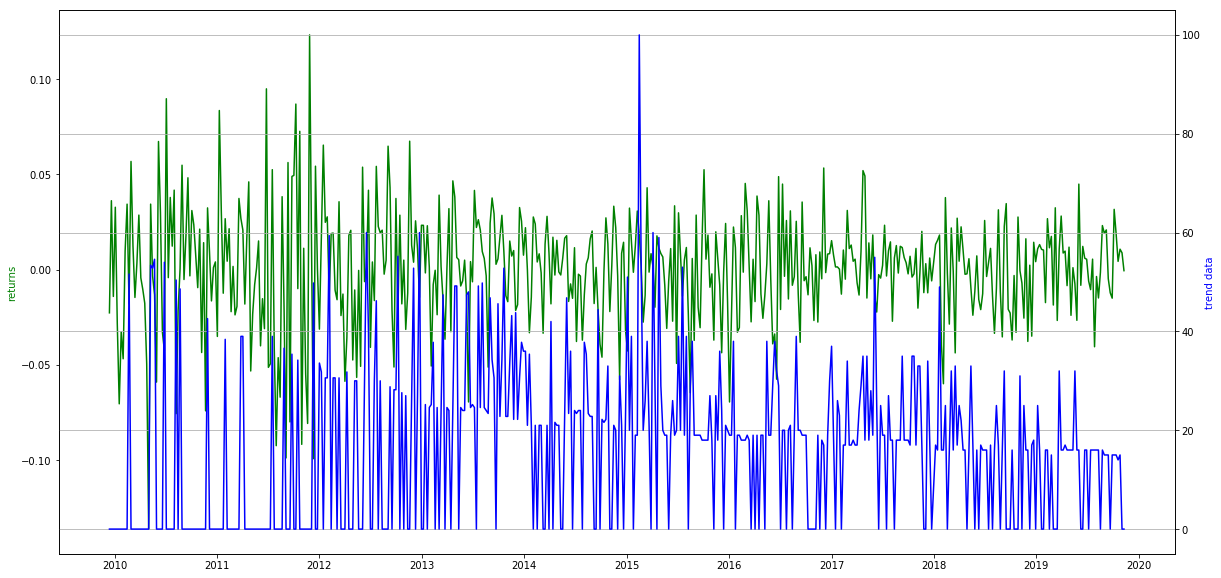

In [33]:
fig, ax1 = plt.subplots(figsize=(20,10))

ax2 = ax1.twinx()
ax1.plot(df.index, df['return'], 'g-')
ax2.plot(df.index, df['popularity'], 'b-')

ax1.set_ylabel('returns', color='g')
ax2.set_ylabel('trend data', color='b')

plt.grid()

The above plot illustrates how the returns and trends move in relation to each other. This is useful for us in indicating whether they do move together at the same dates, and if previous dates of movement for trend data are a good precursor to how the returns are going to move. 

In [34]:
df.corr()

,return,popularity
return,1.000000,0.016697
popularity,0.016697,1.000000


The correlation between return and popularity indicate **at a given date**, whether they move together or one has any effect on the other at that date. Note that, since we will do a regression for lagged trends data, the above correlation (or the lack of correlation) does not imply that trends from previous dates will not be decent predictors for the return today. However, having such a low correlation, still does raise some question marks on the relationship.

# Section 3: Running Predictive Regressions

**Q18**

In [35]:
def transform(df, lag):
    Y = df.iloc[lag+1:]['return']
    X = np.ones((len(Y), lag+1))
    for i in range(len(Y)):
        X[i,:-1] = df.iloc[i:lag+i]['popularity'].iloc[::-1].values
    return X, Y


In [36]:
import statsmodels.api as sm

/Users/akselkohen/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [37]:
for lag in [1, 2, 5, 10, 20, 50]:
    X, Y = transform(df, lag=lag)
    model = sm.OLS(Y, X)
    result = model.fit()
    print('previous days taken: ' + str(lag))
    print('r-squared: ' + str(result.rsquared))
    print('BIC (complexity - more negative the simpler): ' + str(result.bic))
    print('p-values smaller than alpha=0.1: ', result.pvalues[result.pvalues < 0.1])
    print()

previous days taken: 1
r-squared: 0.000430781218828
BIC (complexity - more negative the simpler): -2139.5606633
p-values smaller than alpha=0.1:  Series([], dtype: float64)

previous days taken: 2
r-squared: 0.00204393436582
BIC (complexity - more negative the simpler): -2129.20352777
p-values smaller than alpha=0.1:  Series([], dtype: float64)

previous days taken: 5
r-squared: 0.0102559388251
BIC (complexity - more negative the simpler): -2106.87415277
p-values smaller than alpha=0.1:  Series([], dtype: float64)

previous days taken: 10
r-squared: 0.0167504173125
BIC (complexity - more negative the simpler): -2058.65783761
p-values smaller than alpha=0.1:  Series([], dtype: float64)

previous days taken: 20
r-squared: 0.0336743603135
BIC (complexity - more negative the simpler): -1983.03236517
p-values smaller than alpha=0.1:  x13    0.094474
dtype: float64

previous days taken: 50
r-squared: 0.0925631158837
BIC (complexity - more negative the simpler): -1727.05001194
p-values smalle

Rsquared findings are low for all regression models which means none of the models fit the data very well. In other words, the variations in ETF returns are not well explained by te regression of returns on ETF trends data, for any level of lag. 

In all regression models, almost all p-values are big, meaning that most independent variables(lagged days) are insignficant. Popularity data from most lagged days have a negligible impact on weekly ETF returns.

In [38]:
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 return   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.8466
Date:                Wed, 05 Feb 2020   Prob (F-statistic):              0.762
Time:                        15:57:35   Log-Likelihood:                 1020.2
No. Observations:                 466   AIC:                            -1938.
Df Residuals:                     415   BIC:                            -1727.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0001   9.47e-05     -1.073      0.284      -0.000    8.45e-05
x2         -9.605e-07   9.48e-05     -0.010      0.992      -0.000       0.000
x3             0.0001   9.45e-05      1.186      0.236   -7.37e-05       0.000
x4          9.171e-05   9.46e-05      0.970      0.333   -9.42e-05       0.000
x5          5.363e-05   9.52e-05      0.563      0.574      -0.000       0.000
x6         -5.268e-05   9.49e-05     -0.555      0.579      -0.000       0.000
x7             0.0001   9.54e-05      1.054      0.293    -8.7e-05       0.000
x8            -0.0001   9.54e-05     -1.451      0.147      -0.000    4.91e-05
x9          8.047e-05   9.52e-05      0.845      0.398      -0.000       0.000
x10          9.49e-05   9.51e-05      0.998      0.319   -9.21e-05       0.000
x11            0.0001   9.51e-05      1.080      0.281   -8.43e-05       0.000
x12         7.547e-05   9.53e-05      0.792      0.429      -0.000       0.000
x13           -0.0002   9.53e-05     -1.714      0.087      -0.000     2.4e-05
x14           -0.0001    9.4e-05     -1.068      0.286      -0.000    8.43e-05
x15        -5.845e-05   9.39e-05     -0.622      0.534      -0.000       0.000
x16         9.728e-06   9.32e-05      0.104      0.917      -0.000       0.000
x17           -0.0001   9.32e-05     -1.261      0.208      -0.000    6.57e-05
x18        -7.039e-05   9.32e-05     -0.755      0.450      -0.000       0.000
x19         -1.22e-05   9.32e-05     -0.131      0.896      -0.000       0.000
x20            0.0001   9.35e-05      1.449      0.148   -4.83e-05       0.000
x21         3.079e-05   9.28e-05      0.332      0.740      -0.000       0.000
x22         3.596e-06   9.23e-05      0.039      0.969      -0.000       0.000
x23        -3.851e-06   9.21e-05     -0.042      0.967      -0.000       0.000
x24         8.137e-05   9.21e-05      0.884      0.377   -9.96e-05       0.000
x25        -8.381e-05    9.2e-05     -0.911      0.363      -0.000    9.71e-05
x26         2.267e-05    9.2e-05      0.246      0.806      -0.000       0.000
x27          4.01e-05   9.07e-05      0.442      0.659      -0.000       0.000
x28         6.122e-05   8.99e-05      0.681      0.496      -0.000       0.000
x29            0.0001   8.92e-05      1.248      0.213    -6.4e-05       0.000
x30           -0.0001   8.91e-05     -1.307      0.192      -0.000    5.88e-05
x31         3.907e-05   8.98e-05      0.435      0.664      -0.000       0.000
x32         3.337e-05   8.97e-05      0.372      0.710      -0.000       0.000
x33            0.0002   8.96e-05      1.731      0.084    -2.1e-05       0.000
x34        -1.006e-05   8.96e-05     -0.112      0.911      -0.000       0.000
x35        -9.263e-05   8.96e-05     -1.034      0.302      -0.000    8.34e-05
x36           -0.0002   8.96e-05     -1.769      0.078      -0.000    1.77e-05
x3

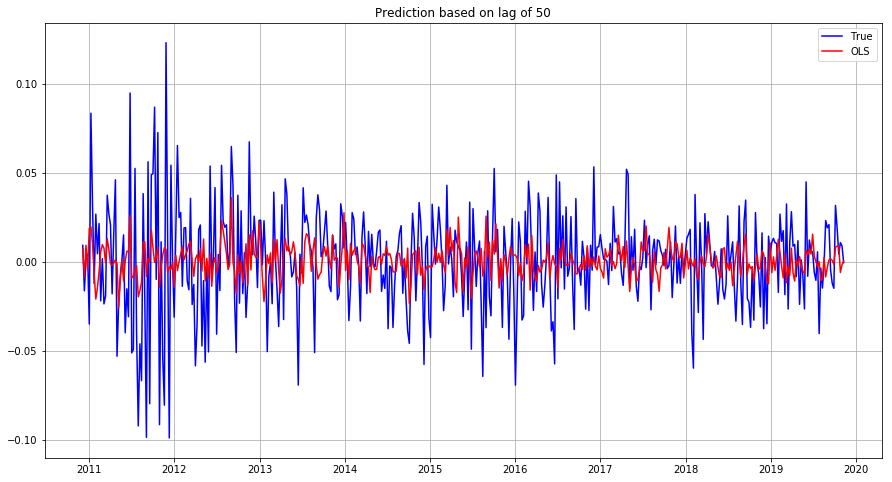

In [39]:
# prstd, iv_l, iv_u = wls_prediction_std(result)

fig, ax = plt.subplots(figsize=(15,8))

ax.plot(Y, 'b-', label="True")
ax.plot(result.fittedvalues, 'r-', label="OLS")
# ax.plot(iv_u, 'r--')
# ax.plot(iv_l, 'r--')
ax.legend(loc='best');
ax.set_title('Prediction based on lag of ' + str(lag))
plt.grid()